In [1]:
# 라이브러리 로딩
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from module import stationarity_adf_test, stationarity_kpss_test

from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

# ARMA

## 실습: 항체형성 호르몬수지 ARMA 모델링

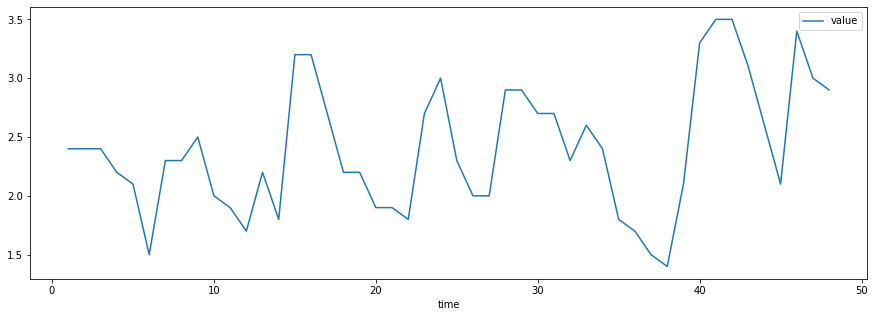

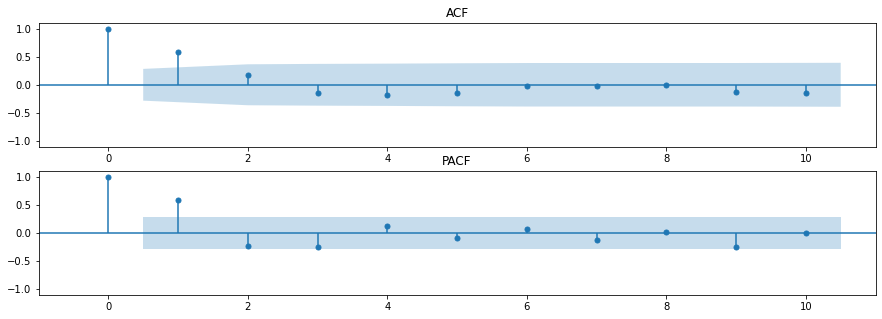

In [11]:
# 데이터로딩 및 확인
data = sm.datasets.get_rdataset("lh")
raw = data.data
raw.plot(x='time', y='value', figsize=(15,5))
plt.show()

# ACF/PACF 확인
plt.figure(figsize=(15,5))
sm.graphics.tsa.plot_acf(raw.value, lags=10, ax=plt.subplot(211))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title('ACF')

sm.graphics.tsa.plot_pacf(raw.value, lags=10, ax=plt.subplot(212))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title('PACF')
plt.show()

In [25]:
# MA(1) 모델링
fit1 = sm.tsa.ARMA(raw.value, (0,1)).fit()
display(fit1.summary())

# AR(1) 모델링
fit2 = sm.tsa.ARMA(raw.value, (1,0)).fit()
display(fit2.summary())

# ARMA(1) 모델링
fit3 = sm.tsa.ARMA(raw.value, (1,1)).fit()
display(fit3.summary())

# AR(1)모형의 AIC가 제일 작으므로 raw.value에는 AR(1)모형이 적합하다고 판단

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                   48
Model:                     ARMA(0, 1)   Log Likelihood                 -31.052
Method:                       css-mle   S.D. of innovations              0.461
Date:                Wed, 22 Jun 2022   AIC                             68.104
Time:                        15:28:14   BIC                             73.717
Sample:                             0   HQIC                            70.225
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4050      0.098     24.576      0.000       2.213       2.597
ma.L1.value     0.4810      0.094      5.093      0.000       0.296       0.666
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.0790           +0.0000j            2.0790            0.5000
-----------------------------------------------------------------------------
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                   48
Model:                     ARMA(1, 0)   Log Likelihood                 -29.379
Method:                       css-mle   S.D. of innovations              0.444
Date:                Wed, 22 Jun 2022   AIC                             64.758
Time:                        15:28:14   BIC                             70.372
Sample:                             0   HQIC                            66.880
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4133      0.147     16.460      0.000       2.126       2.701
ar.L1.value     0.5739      0.116      4.939      0.000       0.346       0.802
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7424           +0.0000j            1.7424            0.0000
-----------------------------------------------------------------------------
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                   48
Model:                     ARMA(1, 1)   Log Likelihood                 -28.762
Method:                       css-mle   S.D. of innovations              0.439
Date:                Wed, 22 Jun 2022   AIC                             65.524
Time:                        15:28:14   BIC                             73.009
Sample:                             0   HQIC                            68.353
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4101      0.136     17.754      0.000       2.144       2.676
ar.L1.value     0.4522      0.177      2.556      0.011       0.105       0.799
ma.L1.value     0.1982      0.171      1.162      0.245      -0.136       0.532
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2114           +0.0000j            2.2114            0.0000
MA.1           -5.0462           +0.0000j            5.0462            0.5000
-----------------------------------------------------------------------------
"""

## 실습: 호흡기질환 사망자수 ARMA 모델링

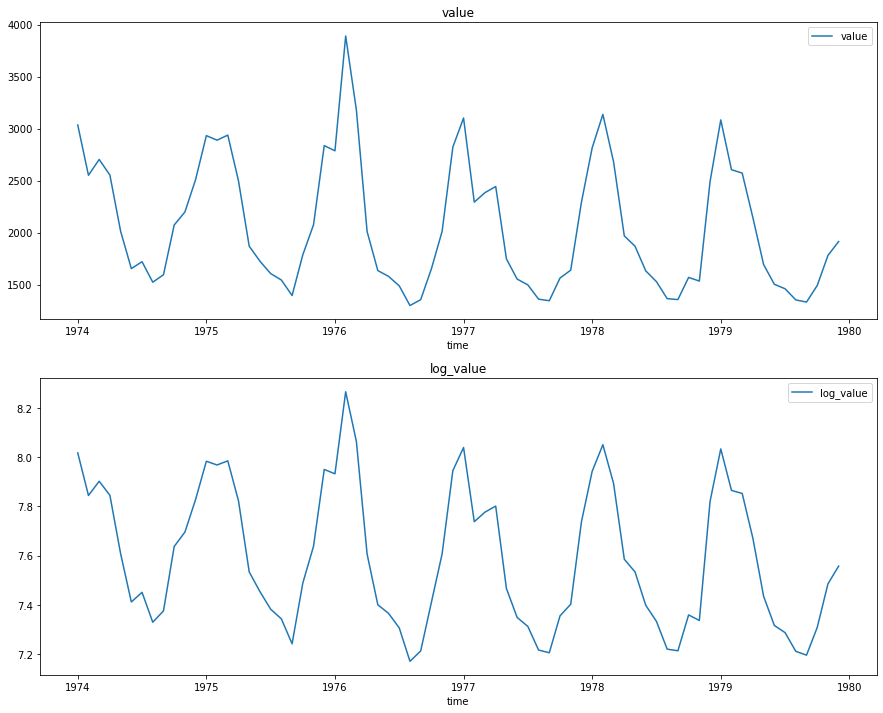

In [45]:
# 데이터로딩 및 확인
data = sm.datasets.get_rdataset("deaths", "MASS")
raw = data.data

# 로그변수 추가
raw['log_value'] = np.log(raw.value)

# 데이터 시각화
plt.figure(figsize=(15, 12))
raw.plot(x='time', y='value', ax=plt.subplot(211))
plt.title('value')

raw.plot(x='time', y='log_value',  ax=plt.subplot(212))
plt.title('log_value')
plt.show()

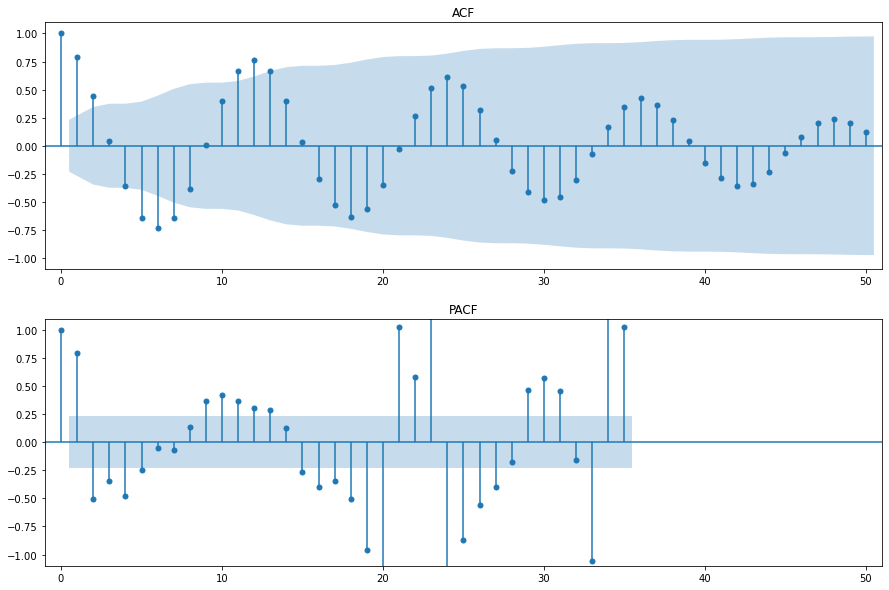

In [51]:
# ACF/PACF 확인
plt.figure(figsize=(15,10))
sm.graphics.tsa.plot_acf(raw['log_value'], lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title('ACF')

# Can only compute partial correlations for lags up to 50% of the sample size. 
# The requested nlags 50 must be < 36.
sm.graphics.tsa.plot_pacf(raw['log_value'], lags=35, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title('PACF')
plt.show()

In [54]:
# ARMA(1,1) 모델링
fit = sm.tsa.ARMA(raw['log_value'], (1,1)).fit()
display(fit.summary())
# 호흡기 질환 데이터에는 ARMA모형이 적합하지 않음

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              log_value   No. Observations:                   72
Model:                     ARMA(1, 1)   Log Likelihood                  31.983
Method:                       css-mle   S.D. of innovations              0.154
Date:                Wed, 22 Jun 2022   AIC                            -55.965
Time:                        16:32:28   BIC                            -46.859
Sample:                             0   HQIC                           -52.340
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.6037      0.080     94.470      0.000       7.446       7.761
ar.L1.log_value     0.6796      0.098      6.970      0.000       0.489       0.871
ma.L1.log_value     0.4680      0.111      4.214      0.000       0.250       0.686
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4713           +0.0000j            1.4713            0.0000
MA.1           -2.1369           +0.0000j            2.1369            0.5000
-----------------------------------------------------------------------------
"""

In [69]:
# 모형최적모수 선택
from itertools import product

# product : 곱집합, 여러 집합들 간에 하나씩 뽑아서 조합을 만들어줍니다.
result = []
for p, q in product(range(4), range(2)):
    if (p == 0 & q == 0):
        continue
    model = sm.tsa.ARMA(raw['log_value'], (p,q)).fit()
    try:
        result.append({'p':p, 'q':q, 'LLF':model.llf, 'AIC':model.aic, 'BIC':model.bic})
    except:
        pass 
print(result)

# result를 DataFrame으로 변환
result = pd.DataFrame(result)
display(result)

# 최적의 ARMA(p,q)를 찾음
opt_ar = result.iloc[np.argmin(result['AIC']), 0]
opt_ma = result.iloc[np.argmin(result['AIC']), 1]
print(f'AR({opt_ar}), MA({opt_ma})')

[{'p': 1, 'q': 0, 'LLF': 24.894296853696773, 'AIC': -43.788593707393545, 'BIC': -36.95859535034538}, {'p': 1, 'q': 1, 'LLF': 31.98260174264145, 'AIC': -55.9652034852829, 'BIC': -46.858539009218674}, {'p': 2, 'q': 0, 'LLF': 35.739121636678576, 'AIC': -63.47824327335715, 'BIC': -54.371578797292926}, {'p': 2, 'q': 1, 'LLF': 44.51288024197491, 'AIC': -79.02576048394982, 'BIC': -67.64242988886954}, {'p': 3, 'q': 0, 'LLF': 38.56019985557846, 'AIC': -67.12039971115692, 'BIC': -55.73706911607664}, {'p': 3, 'q': 1, 'LLF': 45.2799566564136, 'AIC': -78.5599133128272, 'BIC': -64.89991659873087}]


,p,q,LLF,AIC,BIC
0,1,0,24.89,-43.79,-36.96
1,1,1,31.98,-55.97,-46.86
2,2,0,35.74,-63.48,-54.37
3,2,1,44.51,-79.03,-67.64
4,3,0,38.56,-67.12,-55.74
5,3,1,45.28,-78.56,-64.90


AR(2), MA(1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              log_value   No. Observations:                   72
Model:                     ARMA(2, 1)   Log Likelihood                  44.513
Method:                       css-mle   S.D. of innovations              0.128
Date:                Wed, 22 Jun 2022   AIC                            -79.026
Time:                        18:09:40   BIC                            -67.642
Sample:                             0   HQIC                           -74.494
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.5920      0.020    384.993      0.000       7.553       7.631
ar.L1.log_value     1.6407      0.059     27.830      0.000       1.525       1.756
ar.L2.log_value    -0.8787      0.055    -16.027      0.000      -0.986      -0.771
ma.L1.log_value    -0.7021      0.075     -9.363      0.000      -0.849      -0.555
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9336           -0.5162j            1.0668           -0.0804
AR.2            0.9336           +0.5162j            1.0668            0.0804
MA.1            1.4243           +0.0000j            1.4243            0.0000
-----------------------------------------------------------------------------
"""

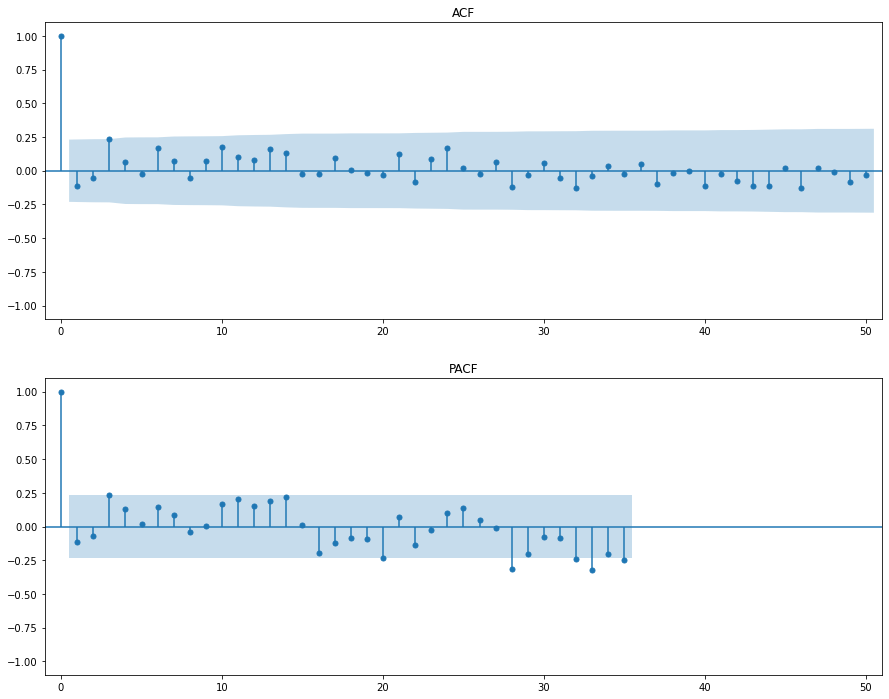

In [75]:
# ARMA(2,1) 모델링
fit = sm.tsa.ARMA(raw['log_value'], (opt_ar, opt_ma)).fit()
display(fit.summary())

# 잔차 ACF/PACF 확인
plt.figure(figsize=(15,12))
sm.graphics.tsa.plot_acf(fit.resid, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title('ACF')

sm.graphics.tsa.plot_pacf(fit.resid, lags=35, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title('PACF')
plt.show()

# ARMAX(ARMA with eXogenous)

## 실습: 통화량을 고려한 소비자지출 ARMAX 모델링

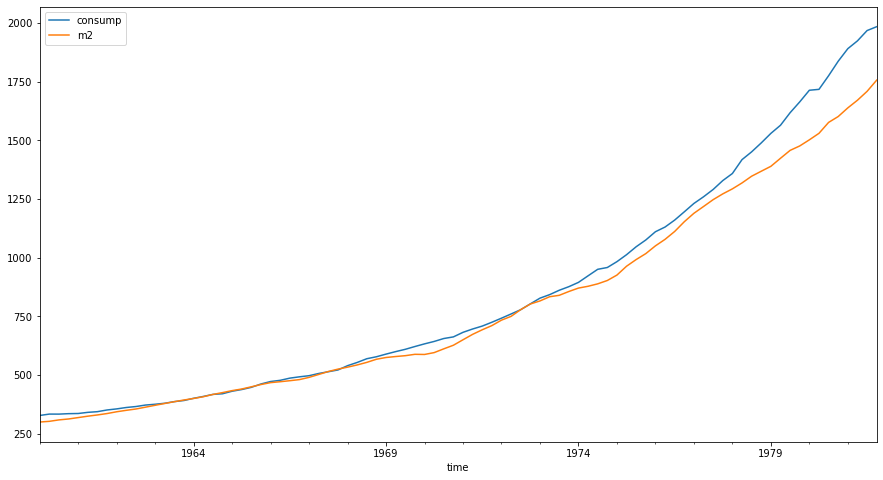

In [85]:
import requests
from io import BytesIO

# 데이터 로딩 및 확인
source_url = requests.get('http://www.stata-press.com/data/r12/friedman2.dta').content
raw = pd.read_stata(BytesIO(source_url))
raw.index = raw['time']
raw_using = raw.loc['1960':'1981', ['consump', 'm2']]

# 데이터 시각화
raw_using.plot(figsize=(15,8))
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                consump   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.721e+04
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          7.72e-101
Time:                        19:13:19   Log-Likelihood:                -434.48
No. Observations:                  88   AIC:                             873.0
Df Residuals:                      86   BIC:                             877.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -61.7547      7.788     -7.930      0.000     -77.237     -46.273
m2             1.1406      0.009    131.182      0.000       1.123       1.158
==============================================================================
Omnibus:                        0.847   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.669
Skew:                           0.213   Prob(JB):                        0.716
Kurtosis:                       2.984   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

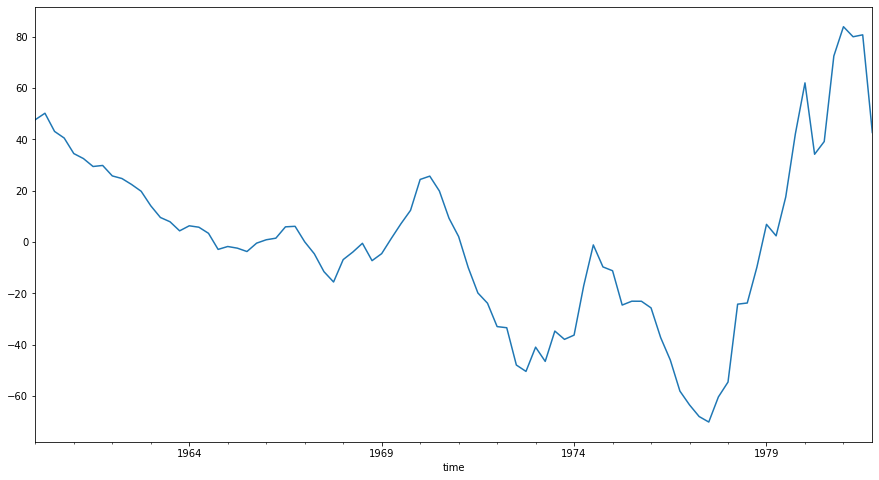

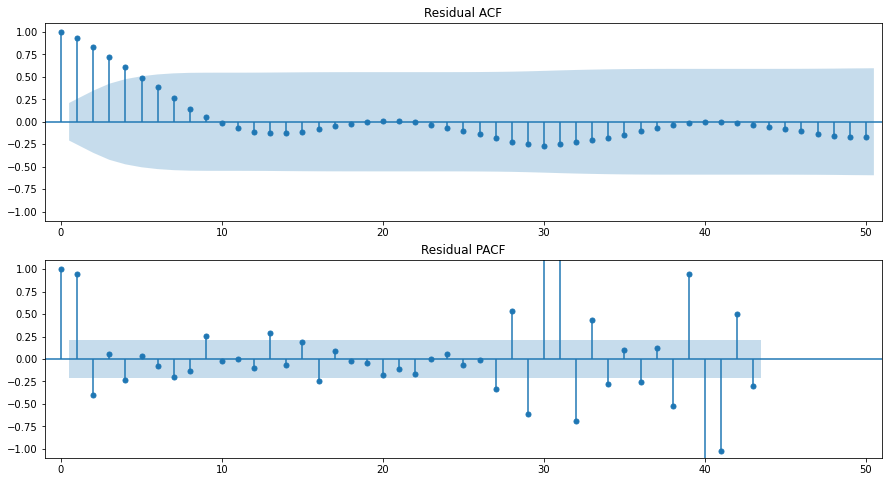

In [89]:
# 회귀분석
fit = sm.OLS(raw_using.consump, sm.add_constant(raw_using.m2)).fit()
display(fit.summary())

# 잔차 확인
fit.resid.plot(figsize=(15,8))
plt.show()

# 잔차 ACF/PACF
plt.figure(figsize=(15,8))
sm.graphics.tsa.plot_acf(fit.resid, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

sm.graphics.tsa.plot_pacf(fit.resid, lags=43, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.show()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                consump   No. Observations:                   88
Model:                     ARMA(1, 1)   Log Likelihood                -327.699
Method:                       css-mle   S.D. of innovations              9.873
Date:                Wed, 22 Jun 2022   AIC                            665.398
Time:                        19:21:25   BIC                            677.784
Sample:                    01-01-1960   HQIC                           670.388
                         - 10-01-1981                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -37.6175     36.040     -1.044      0.297    -108.255      33.020
m2                1.1232      0.034     33.284      0.000       1.057       1.189
ar.L1.consump     0.9330      0.043     21.867      0.000       0.849       1.017
ma.L1.consump     0.3106      0.116      2.682      0.007       0.084       0.538
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0718           +0.0000j            1.0718            0.0000
MA.1           -3.2199           +0.0000j            3.2199            0.5000
-----------------------------------------------------------------------------
"""

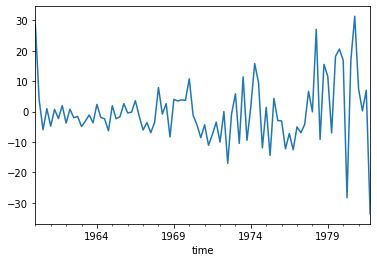

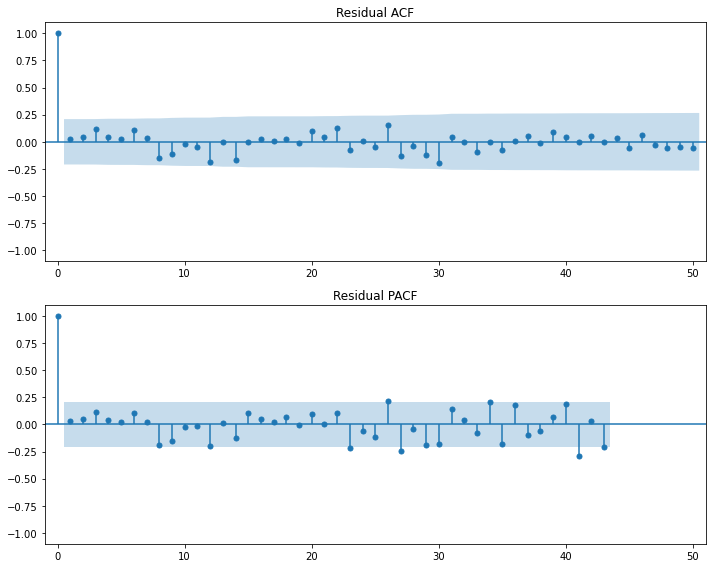

In [93]:
# ARMAX
fit = sm.tsa.ARMA(raw_using.consump, (1,1), exog=raw_using.m2).fit()
display(fit.summary())

## 잔차 확인
fit.resid.plot()
plt.show()

## 잔차 ACF/PACF
plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(fit.resid, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

sm.graphics.tsa.plot_pacf(fit.resid, lags=43, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.tight_layout()
plt.show()

# OLS로 추정했을 때 보다 잔차가 백색잡음에 가깝다.

# SARIMA

## 실습: 호흡기질환 사망자수 SARIMA 모델링

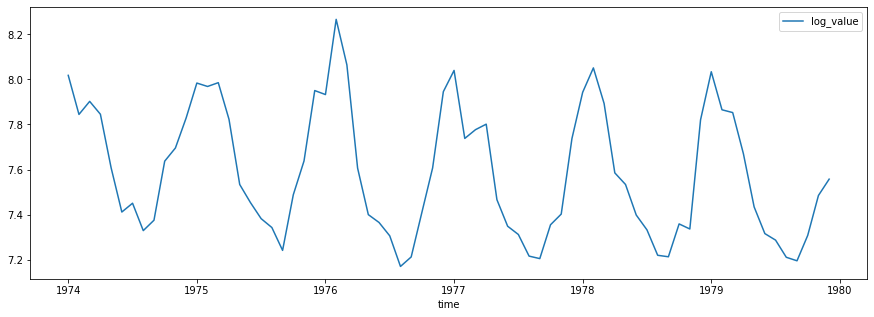

In [8]:
# 데이터로딩 및 시각화
data = sm.datasets.get_rdataset('deaths', 'MASS')
raw = data.data
raw['log_value'] = np.log(raw['value'])
raw.plot(x='time', y='log_value', figsize=(15,5))
plt.show()

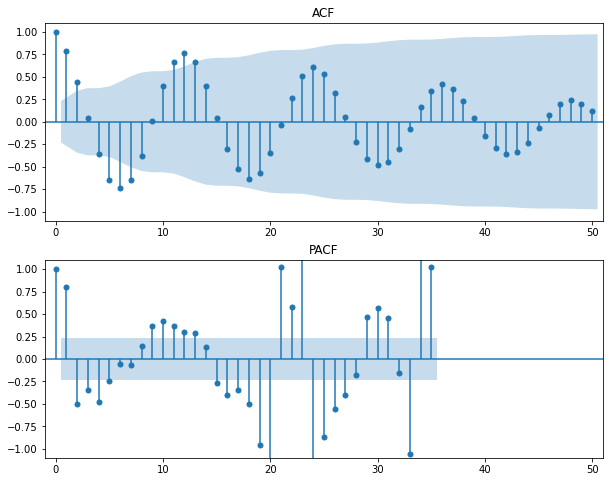

In [11]:
# 데이터 ACF/PACF 확인
plt.figure(figsize=(10,8))
sm.graphics.tsa.plot_acf(raw['log_value'].values, lags=50, ax = plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title('ACF')

sm.graphics.tsa.plot_pacf(raw['log_value'].values, lags=35, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title('PACF')
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              log_value   No. Observations:                   72
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  31.982
Date:                Fri, 24 Jun 2022   AIC                            -55.965
Time:                        15:41:38   BIC                            -46.858
Sample:                             0   HQIC                           -52.339
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4194      0.765      3.161      0.002       0.919       3.920
ar.L1          0.6818      0.100      6.846      0.000       0.487       0.877
ma.L1          0.4668      0.116      4.027      0.000       0.240       0.694
sigma2         0.0236      0.004      5.416      0.000       0.015       0.032
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                12.13
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.94
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

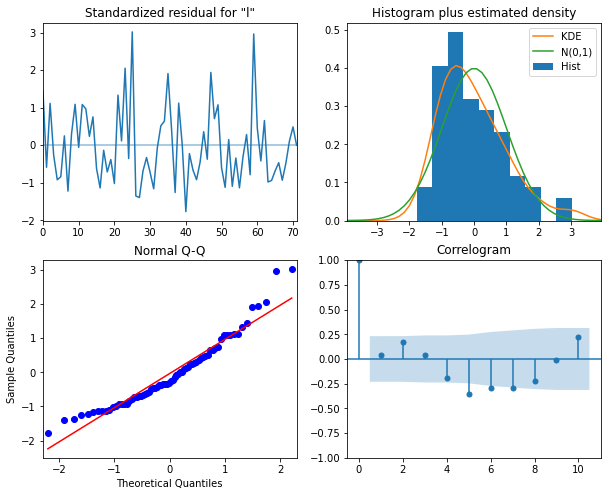

In [13]:
# 데이터 모델링1
# non-seasonal : ARIMA(1,0,1), seasonal : ARIMA(0,0,0,0)
fit = sm.tsa.SARIMAX(raw['log_value'], trend='c', order=(1,0,1), seasonal_order=(0, 0, 0, 0)).fit()
display(fit.summary())

# 잔차진단
fit.plot_diagnostics(figsize=(10,8))
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          log_value   No. Observations:                   72
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  52.592
Date:                            Fri, 24 Jun 2022   AIC                            -93.184
Time:                                    15:57:59   BIC                            -80.618
Sample:                                         0   HQIC                           -88.269
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0480      0.022     -2.209      0.027      -0.091      -0.005
ar.L1         -0.1539      0.436     -0.353      0.724      -1.008       0.700
ma.L1          0.5698      0.273      2.089      0.037       0.035       1.105
ar.S.L12      -0.2863      0.204     -1.407      0.160      -0.685       0.113
ma.S.L12      -0.9694      4.688     -0.207      0.836     -10.158       8.220
sigma2         0.0066      0.030      0.219      0.826      -0.052       0.065
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                74.24
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.99
Prob(H) (two-sided):                  0.32   Kurtosis:                         8.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

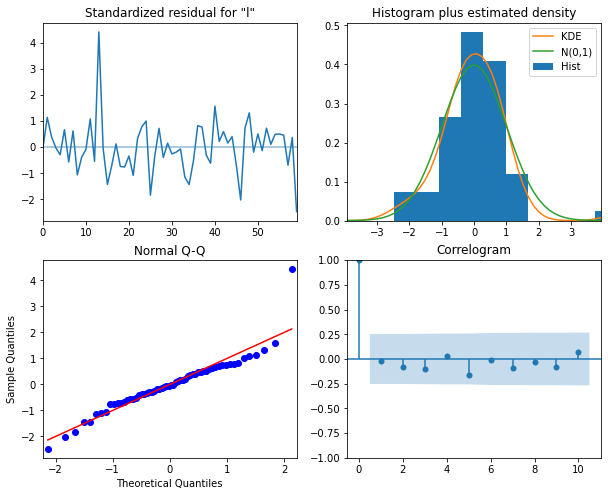

In [14]:
# 데이터 모델링2
# non-seasonal : ARIMA(1,0,1), seasonal : ARIMA(1,1,1,12)
fit = sm.tsa.SARIMAX(raw['log_value'], trend='c', order=(1,0,1), seasonal_order=(1,1,1,12)).fit()
display(fit.summary())

# 잔차진단
fit.plot_diagnostics(figsize=(10,8))
plt.show()

## 실습: 항공사 승객수요 SARIMA 모델링

In [22]:
# 데이터 준비
data = sm.datasets.get_rdataset('AirPassengers')
raw = data.data.copy()

# 시간 인덱싱
raw.index = pd.date_range(start='1/1/1949', periods = len(raw['time']), freq='M')
raw = raw.drop('time', axis = 1)
raw

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


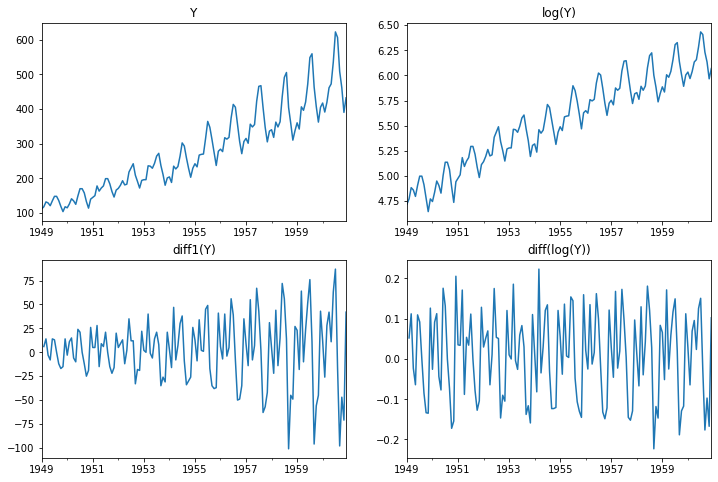

In [24]:
# 데이터 시각화 
plt.figure(figsize=(12,8))
# 원본 데이터 시각화, 데이터의 분산이 시간이 지날수록 커집니다. 상승하는 추세가 존재합니다.
raw.plot(ax = plt.subplot(221), title='Y', legend=False)

# 로그씌워서 분산을 모든 시간에서 일정하게 만들어줍니다.
np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False)

# 데이터 1차 차분 후 시각화, 차분을 통해 추세를 없애줍니다.
raw.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)

# 로그씌우고 차분해서 시각화, 분산 및 추세를 없애줍니다.
np.log(raw).diff(1).plot(ax=plt.subplot(224), title='diff(log(Y))', legend=False)
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -694.060
Date:                Fri, 24 Jun 2022   AIC                           1396.121
Time:                        16:24:47   BIC                           1407.972
Sample:                    01-31-1949   HQIC                          1400.937
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6187      5.001      0.724      0.469      -6.183      13.421
ar.L1         -0.4768      0.128     -3.736      0.000      -0.727      -0.227
ma.L1          0.8646      0.080     10.746      0.000       0.707       1.022
sigma2       958.4115    107.040      8.954      0.000     748.616    1168.207
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.64   Prob(JB):                         0.34
Heteroskedasticity (H):               7.01   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

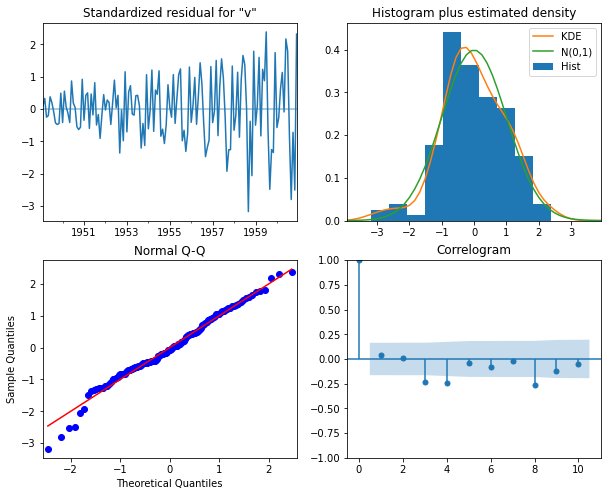

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 124.804
Date:                Fri, 24 Jun 2022   AIC                           -241.608
Time:                        16:24:48   BIC                           -229.756
Sample:                    01-31-1949   HQIC                          -236.792
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0155      0.016      0.963      0.336      -0.016       0.047
ar.L1         -0.5826      0.170     -3.430      0.001      -0.915      -0.250
ma.L1          0.8502      0.101      8.455      0.000       0.653       1.047
sigma2         0.0102      0.002      5.871      0.000       0.007       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 5.93
Prob(Q):                              0.87   Prob(JB):                         0.05
Heteroskedasticity (H):               1.07   Skew:                             0.04
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

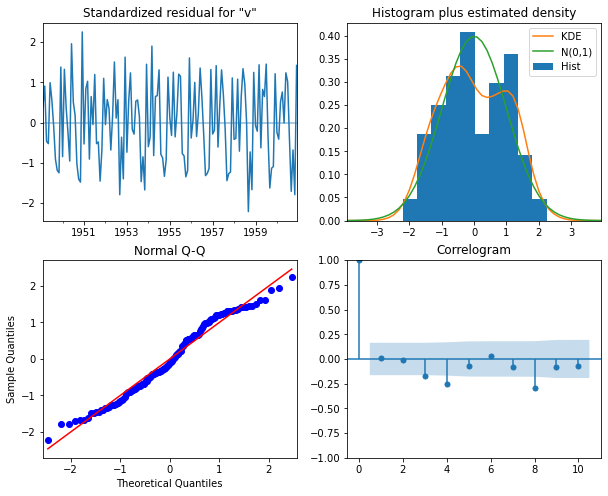

In [25]:
# simplt SARIMA
# 원본 데이터 모델링
# non-seasonal : ARIMA(1,1,1), seasonal : ARIMA(0,0,0,0)
fit = sm.tsa.SARIMAX(raw.value, trend='c', order=(1,1,1), seasonal_order=(0,0,0,0)).fit()
display(fit.summary())

# 잔차진단
fit.plot_diagnostics(figsize=(10,8))
plt.show()

# 로그(원본 데이터) 모델링
# non-seasonal : ARIMA(1,1,1), seasonal : ARIMA(0,0,0,0)
fit = sm.tsa.SARIMAX(np.log(raw.value), trend='c', order=(1,1,1), seasonal_order=(0,0,0,0)).fit()
display(fit.summary())

# 잔차진단
fit.plot_diagnostics(figsize=(10,8))
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 244.847
Date:                            Fri, 24 Jun 2022   AIC                           -477.694
Time:                                    16:40:42   BIC                           -460.443
Sample:                                01-31-1949   HQIC                          -470.684
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0003      0.001     -0.255      0.798      -0.003       0.002
ar.L1          0.0326      0.235      0.139      0.890      -0.428       0.493
ma.L1         -0.4254      0.218     -1.954      0.051      -0.852       0.001
ar.S.L12      -0.1632      0.201     -0.810      0.418      -0.558       0.232
ma.S.L12      -0.4422      0.226     -1.956      0.051      -0.885       0.001
sigma2         0.0014      0.000      8.316      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.96
Prob(Q):                              0.87   Prob(JB):                         0.38
Heteroskedasticity (H):               0.60   Skew:                             0.02
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

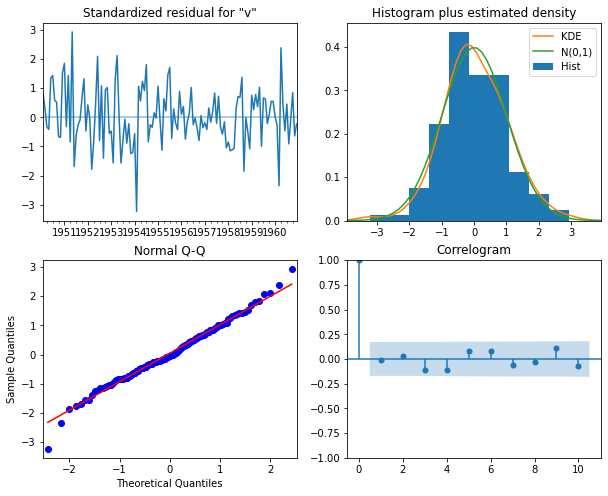

In [28]:
# multiplicated SARIMA
# log(원본데이터) 모델링
# non-seasonal : ARIMA(1,1,1), seasonal : ARIMA(1,1,1,12)
fit = sm.tsa.SARIMAX(np.log(raw.value), trend='c', order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
display(fit.summary())

# 잔차진단
fit.plot_diagnostics(figsize=(10,8))
plt.show()

# Auto-ARIMA로 항공사 승객수요 실습

In [5]:
# 데이터 준비
data = sm.datasets.get_rdataset('AirPassengers')
raw = data.data.copy()

# 시간 인덱싱
raw.index = pd.date_range(start='1/1/1949', periods=len(raw['time']), freq='M')
raw.drop(labels='time', axis=1, inplace=True)
raw

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


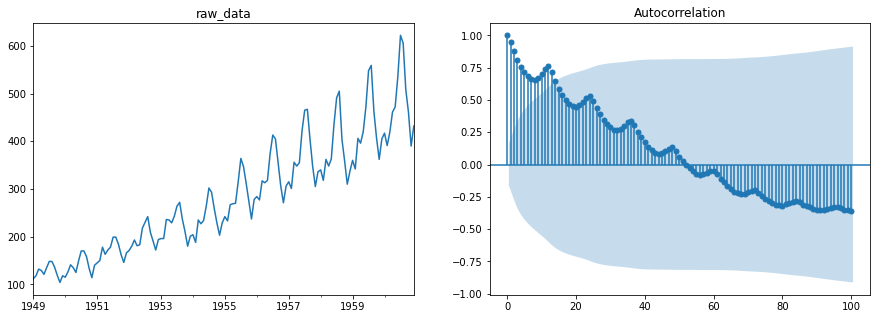

,Stationarity_adf
Test Statistics,0.82
p-value,0.99
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,996.69
,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00


In [87]:
# 데이터 시각화 및 정상성 테스트
plt.figure(figsize=(15,5))
raw.plot(ax=plt.subplot(121), title='raw_data', legend=False)
sm.graphics.tsa.plot_acf(candidate_none, lags=100, use_vlines=True, ax=plt.subplot(122))
plt.show()

candidate_none = raw.copy()
display_side_by_side(stationarity_adf_test(candidate_none.values.flatten(), []), stationarity_kpss_test(candidate_none.values.flatten(), []))

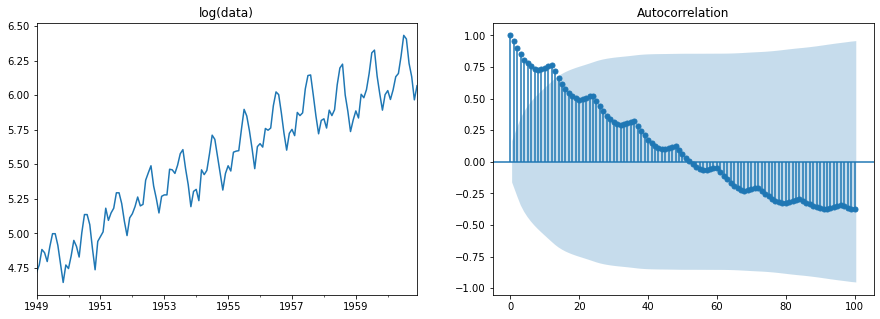

,Stationarity_adf
Test Statistics,-1.72
p-value,0.42
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,-445.40
,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00


In [90]:
# 로그변환 후 데이터 시각화 및 정상성 테스트
candidate_trend = np.log(raw).copy()
plt.figure(figsize=(15,5))
candidate_trend.plot(ax=plt.subplot(121), title='log(data)', legend=False)
sm.graphics.tsa.plot_acf(candidate_trend, lags=100, use_vlines=True, ax=plt.subplot(122))
plt.show()

display_side_by_side(stationarity_adf_test(candidate_trend.values.flatten(), []), stationarity_kpss_test(candidate_trend.values.flatten(), []))

Trend Difference:  1


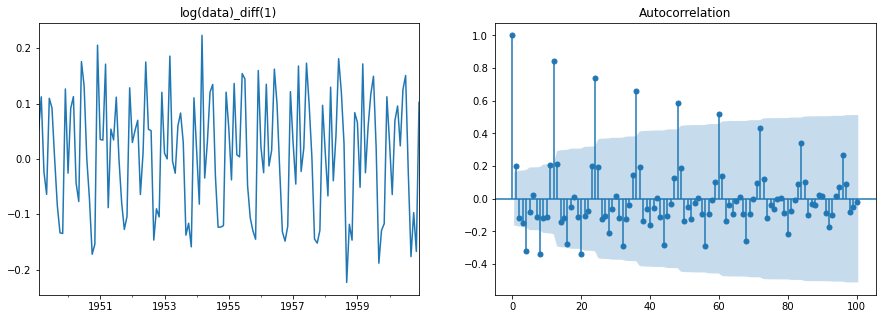

,Stationarity_adf
Test Statistics,-2.72
p-value,0.07
Used Lag,14.00
Used Observations,128.00
Critical Value(1%),-3.48
Maximum Information Criteria,-440.36
,Stationarity_kpss
Test Statistics,0.10
p-value,0.10
Used Lag,14.00


In [92]:
# 추세차분 order 정하기
trend_diff_order_initial = 0
result = stationarity_adf_test(candidate_trend.values.flatten(), []).T
if result['p-value'].values.flatten() < 0.1 :
    trend_diff_order = trend_diff_order_initial
else:
    trend_diff_order = trend_diff_order_initial + 1
print('Trend Difference: ', trend_diff_order)

# 로그+추세차분 변환 후 데이터 시각화 및 정상성 테스트
candidate_seasonal = candidate_trend.diff(trend_diff_order).dropna().copy()
plt.figure(figsize=(15,5))
candidate_seasonal.plot(ax=plt.subplot(121), title='log(data)_diff(1)', legend=False)
sm.graphics.tsa.plot_acf(candidate_seasonal, lags=100, use_vlines = True, ax=plt.subplot(122))
plt.show()

display_side_by_side(stationarity_adf_test(candidate_seasonal.values.flatten(), []),
                    stationarity_kpss_test(candidate_seasonal.values.flatten(), []))


Seasonal Difference:  12


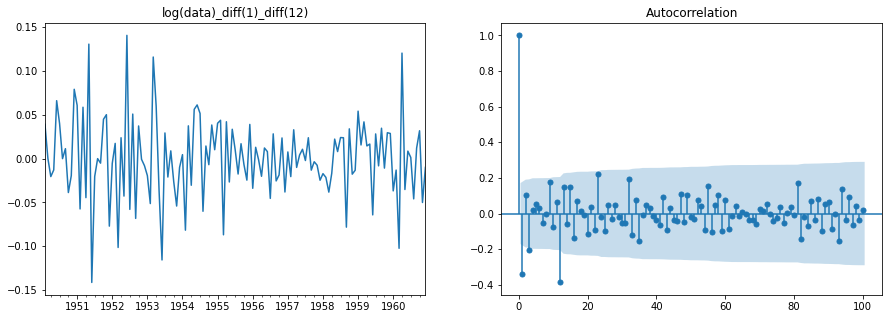

,Stationarity_adf
Test Statistics,-4.44
p-value,0.00
Used Lag,12.00
Used Observations,118.00
Critical Value(1%),-3.49
Maximum Information Criteria,-415.56
,Stationarity_kpss
Test Statistics,0.11
p-value,0.10
Used Lag,13.00


In [93]:
# 계절차분 order 정하기
seasonal_diff_order = sm.tsa.acf(candidate_seasonal)[1:].argmax() + 1
print('Seasonal Difference: ', seasonal_diff_order)

# 로그+추세차분+계절차분 변환 후 데이터 시각화 및 정상성 테스트
candidate_final = candidate_seasonal.diff(int(seasonal_diff_order)).dropna().copy()
plt.figure(figsize=(15,5))
candidate_final.plot(ax=plt.subplot(121), title='log(data)_diff(1)_diff(12)', legend=False)
sm.graphics.tsa.plot_acf(candidate_final, lags=100, use_vlines=True, ax=plt.subplot(122))
plt.show()

display_side_by_side(stationarity_adf_test(candidate_final.values.flatten(), []),
                    stationarity_kpss_test(candidate_final.values.flatten(), []))